# Simple Linear Regression 를 TensorFlow 로 구현하기

- 목표 : 선형회귀(Linear Regression)을 코드로 구현한다.   
- 핵심 키워드 : 선형회귀, 가설, 비용함수
- url : https://www.boostcourse.org/ai212/lecture/41844/


In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.1.0


In [2]:
# 입력값
x_data =[1,2,3,4,5]
# 실제값
y_data =[1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

# 예측
hypothesis = W * x_data+b
hypothesis

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 3.4     ,  6.3     ,  9.200001, 12.1     , 15.      ],
      dtype=float32)>

In [3]:
# 에러(hypothesis - y_data) 제곱의 평균
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
cost

<tf.Tensor: shape=(), dtype=float32, numpy=45.660004>

In [4]:
# tf를 이용한 평균
v = [1.,2.,3.,4.]
tf.reduce_mean(v)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [5]:
# tf를 이용한 제곱
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

## Gradient Descent 
- 경사하강법
- minimize cost(W,b) :cost를 최소화 하는 방법

In [6]:
# Learning rate initalize (초기 학습 비율) :  한번 경사하강의 크기 
learning_rate = 0.01

# Gradient desent 경사하강법
with tf.GradientTape() as tape:
    hypothesis = W* x_data + b 
    cost = tf.reduce_mean(tf.square(hypothesis- y_data))
    
W_grad , b_grad = tape.gradient(cost,[W,b])

# A.assign_sub(B)  : A = A-B  or A -= B 함수
W.assign_sub(learning_rate*W_grad)
b.assign_sub(learning_rate*b_grad)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.376>

(0, 8)

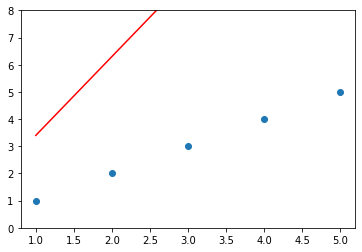

In [8]:
import matplotlib.pyplot as plt
# 초기 예측
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

---
# Full Code 

In [9]:
import tensorflow as tf

x_data =[1,2,3,4,5]
y_data =[1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

# Gradient desent 경사하강법
for i in range(100+1):
    with tf.GradientTape() as tape:
        hypothesis = W* x_data + b 
        cost = tf.reduce_mean(tf.square(hypothesis- y_data))

    W_grad , b_grad = tape.gradient(cost,[W,b])

    W.assign_sub(learning_rate*W_grad)
    b.assign_sub(learning_rate*b_grad)
    if i % 10 ==0 :
        print("{:5}|{:10.4}|{:10.4}||{:10.6f}".format(i,W.numpy(),b.numpy(),cost))

    0|     2.452|     0.376|| 45.660004
   10|     1.104|  0.003398||  0.206336
   20|     1.013|  -0.02091||  0.001026
   30|     1.007|  -0.02184||  0.000093
   40|     1.006|  -0.02123||  0.000083
   50|     1.006|  -0.02053||  0.000077
   60|     1.005|  -0.01984||  0.000072
   70|     1.005|  -0.01918||  0.000067
   80|     1.005|  -0.01854||  0.000063
   90|     1.005|  -0.01793||  0.000059
  100|     1.005|  -0.01733||  0.000055


- i ｜ W ｜ b ｜ cost  
- i가 증가할 수록 W 값은 1로 가까워지고, b 값이 줄어들며 cost값도 0으로 가까이 수렴하고 있는 것을 확인할 수 있다.
- 이를 통해 오차 값이 줄어드는 것을 알 수 있다.

(0, 8)

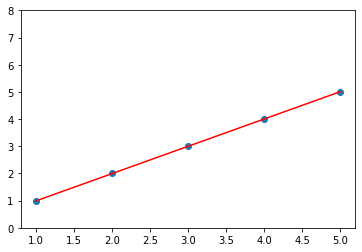

In [10]:

plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

In [11]:
# 위에서 만든 모델을 통한 예측 
print(W*5+b)
print(W*2.5+b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)
